In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.sample(5)

,v1,v2
1565,ham,"The &lt;#&gt; g that i saw a few days ago, th..."
101,ham,I'm still looking for a car to buy. And have n...
1543,spam,Hello from Orange. For 1 month's free access t...
1710,ham,"(No promises on when though, haven't even gott..."
5016,spam,Dear 0776xxxxxxx U've been invited to XCHAT. T...


In [7]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace='True')
df.sample(5)

,target,text
3536,ham,Mmmmm ... It was sooooo good to wake to your w...
5350,ham,No one interested. May be some business plan.
985,ham,Carlos says he'll be at mu in &lt;#&gt; minutes
2711,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."
2882,ham,Anything lor is she coming?


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(5169, 2)

EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

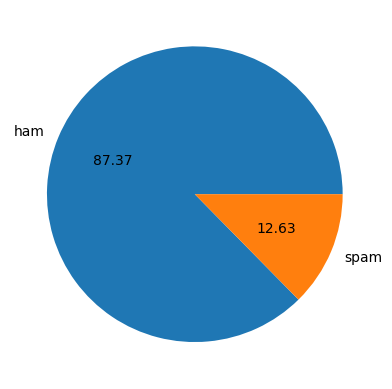

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show

Data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\subhr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_charecters'] = df['text'].apply(len)

In [21]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(x.split()))  # Simple splitting

In [23]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [24]:
import re
df['num_sentences'] = df['text'].apply(lambda x: len(re.split(r'[.!?]', x)))


In [25]:
df.head()

,target,text,num_charecters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9
1,0,Ok lar... Joking wif u oni...,29,6,7
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,7
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [26]:
df[['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,3.461018
std,58.236293,11.068488,2.686481
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,2.000000
50%,60.000000,12.000000,3.000000
75%,117.000000,22.000000,4.000000
max,910.000000,171.000000,43.000000


In [27]:
#ham
df[df['target'] == 0][['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,3.384190
std,56.358207,11.116240,2.773408
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,2.000000
50%,52.000000,11.000000,3.000000
75%,90.000000,18.000000,4.000000
max,910.000000,171.000000,43.000000


In [28]:
#spam
df[df['target'] == 1][['num_charecters', 'num_words', 'num_sentences']].describe()

,num_charecters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.992343
std,30.137753,5.967672,1.902114
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,3.000000
50%,149.000000,25.000000,4.000000
75%,157.000000,28.000000,5.000000
max,224.000000,35.000000,14.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_charecters', ylabel='Count'>

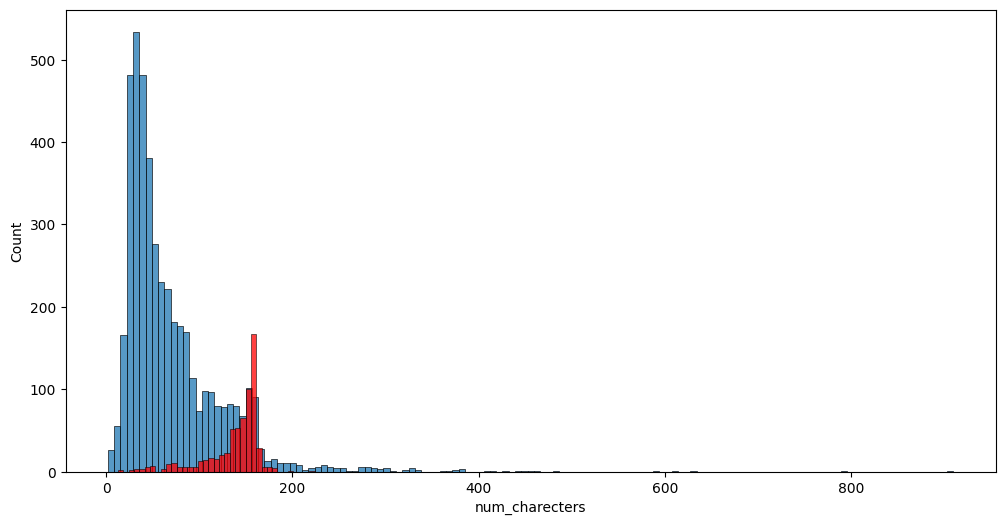

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_charecters'])
sns.histplot(df[df['target'] == 1]['num_charecters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

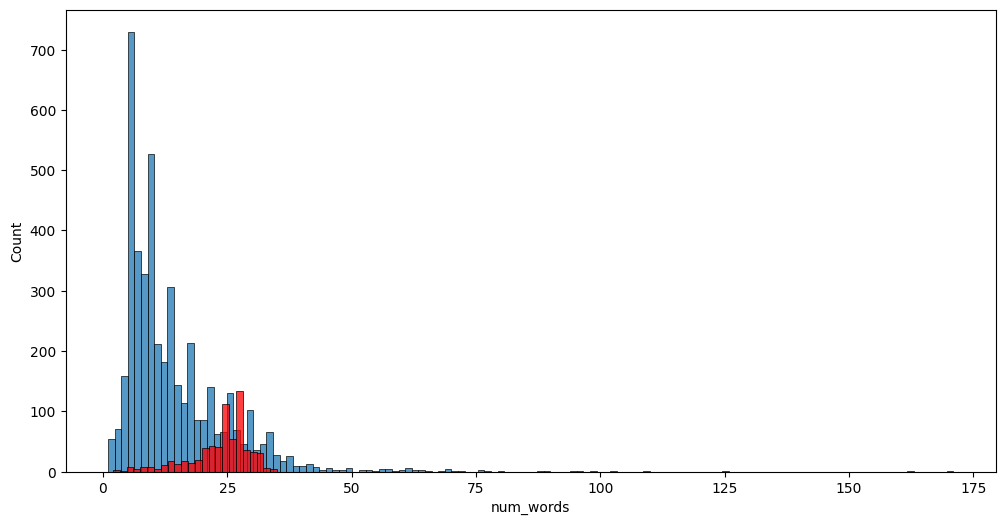

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

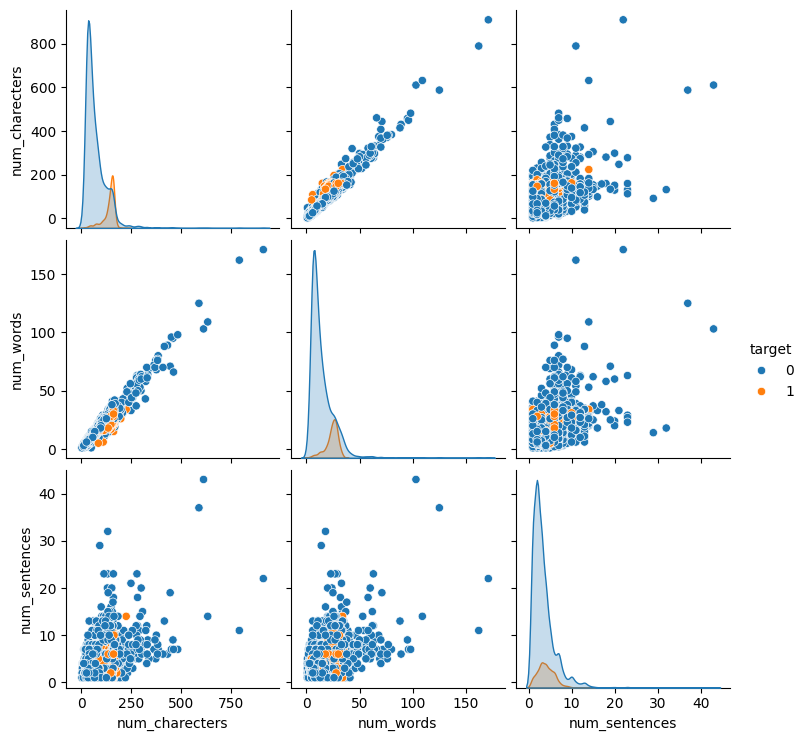

In [32]:
sns.pairplot(df, hue='target')

<Axes: >

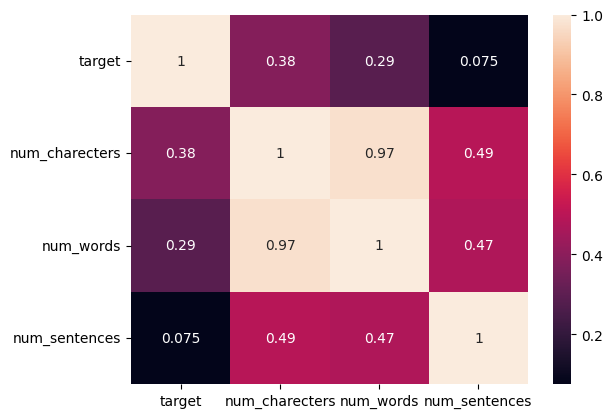

In [39]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

Data Preproccesing 

-> Lower Case

-> Tokenization

-> Removing special charecter

-> Removing stop words and punctuation

-> Stemming

In [90]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = text.split()

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [91]:
transform_text('i love danching.')

'love'

In [92]:
df['text'].apply(transform_text)

0       go jurong avail bugi n great world la e cine g...
1                                           ok joke wif u
2       free entri 2 wkli comp win fa cup final tkt 21...
3                             u dun say earli u c alreadi
4                        nah think goe live around though
                              ...                        
5567    2nd time tri 2 contact u pound 2 claim call 08...
5568                                     b go esplanad fr
5569                                                 mood
5570    guy bitch act like interest buy someth els nex...
5571                                            true name
Name: text, Length: 5169, dtype: object

In [94]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


In [105]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [106]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

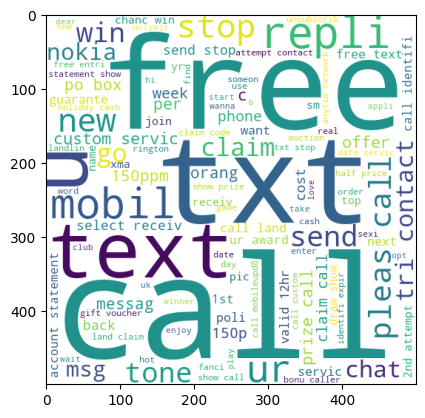

In [109]:
plt.imshow(spam_wc)

In [110]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

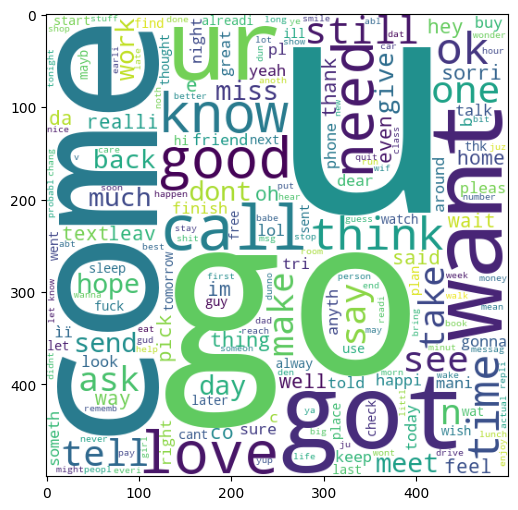

In [111]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [112]:
df.head()

,target,text,num_charecters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,9,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,7,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,7,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


In [119]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [120]:
len(spam_corpus)

8176

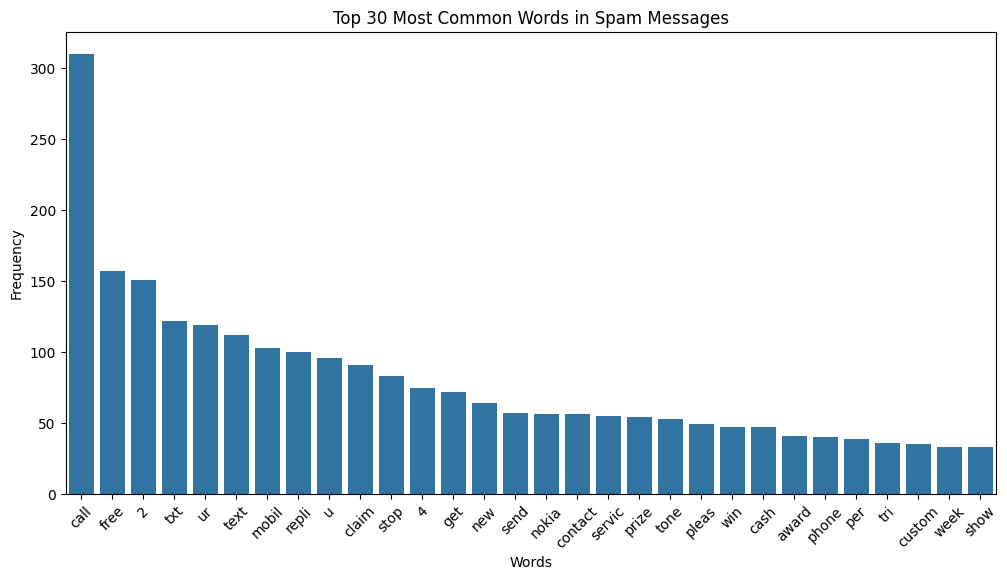

In [124]:
from collections import Counter
spam_word_counts = Counter(spam_corpus).most_common(30)

# Convert to DataFrame with proper column names
df_spam_words = pd.DataFrame(spam_word_counts, columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Count", data=df_spam_words)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

In [125]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [126]:
len(ham_corpus)

27382

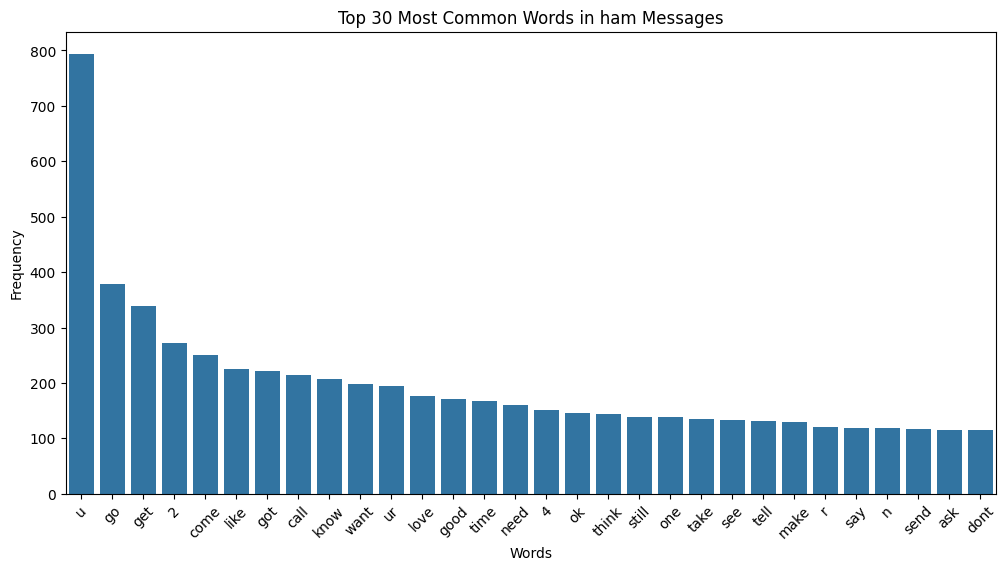

In [127]:
from collections import Counter
ham_word_counts = Counter(ham_corpus).most_common(30)

# Convert to DataFrame with proper column names
df_ham_words = pd.DataFrame(ham_word_counts, columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Count", data=df_ham_words)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in ham Messages")
plt.show()

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer

In [151]:
# X = cv.fit_transform(df['transformed_text']).toarray()
# Ensure 'transformed_text' is a list or Series of strings
X = tfidf.fit_transform(df['transformed_text'].astype(str)).toarray()

In [152]:
X.shape

(5169, 5643)

In [154]:
y = df['target'].values

In [155]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [158]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [159]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [160]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.7940038684719536
[[707 189]
 [ 24 114]]
0.37623762376237624


In [161]:
mnb.fit(X_train, y_train)
y_pred2 =mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9516441005802708
[[896   0]
 [ 50  88]]
1.0


In [162]:
bnb.fit(X_train, y_train)
y_pred3 =bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9709864603481625
[[892   4]
 [ 26 112]]
0.9655172413793104


tfidf --> MNB

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

NameError: name 'SVC' is not defined

In [2]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

NameError: name 'svc' is not defined

In [166]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [167]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.965183752417795, np.float64(0.9322033898305084))

In [1]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    print(f"Training {name}...")
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    # Optionally: Add a check to save intermediate results to avoid losing data
    # For example, you can log results to a file.


NameError: name 'clfs' is not defined

In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_score}).sort_values('Precision', ascending=False)